# Parse the csv
First we will need to parse the CSV

In [1]:
import csv

# parse the csv file
filename = 'C:/Users/Andreas/Documents/CCL/QVModels/BS-large-data-positive-payoff'
file = open(filename)
readCSV = csv.reader(file, delimiter=',')

runs = []
titles = []
for row in readCSV:
    if row[0] == "[run number]":
        titles = row
        continue
    entry = {}
    if len(row) == 13 :
        for titleNumber in range(0, len(titles)):
            entry[titles[titleNumber]] = row[titleNumber]
        runs.append(entry)

# runs have been parsed into a dictionary
# it should be easy to get the data now

## Find the percentage of election resulted in a positive pivotality, as a function of mean and variance

In [2]:
# This function is used below to update the list 
def updateResult(tup, list):
    for t in list:
        if t[0]==tup[0] and t[1]==tup[1]:
            t = tup
            return;

# Now we find the percent of positive payoff
# result[0] = pivotality, [1] = Variance in perceived p, [2] = % of positive Payoff,
# [3] = # of positive payoff, [4] = # of runs
results = []
for run in runs: 
    currentResult = list(filter(lambda result: result[0] == float(run["marginal-pivotality"]) and result[1] == float(run["precision variance-of-perceived-pivotality 4"]), results))
    if not currentResult:
        results.append([float(run["marginal-pivotality"]), float(run["precision variance-of-perceived-pivotality 4"]), int(run["payoff >= 0"] == "true"), int(run["payoff >= 0"] == "true"), 1])
    else:
        currentResult = currentResult[0]
        currentResult[3] += int(run["payoff >= 0"] == "true")
        currentResult[4] += 1
        currentResult[2] = currentResult[3]/currentResult[4]
        updateResult(currentResult, results)


# filtering out bad data
# There was somehow one variance of pivotality with only two tests, removing it
results = filter(lambda result: result[4] > 10, results)
# print("Results:\n")
# for result in results:
#    print("Pivotality: " + result[0] + " VarPP: " + result[1] + " Rate of positive payoff: " + str(result[2]) +
#    " # of runs with Positive Payoff/# of runs: "+str(result[3]) + "/" + str(result[4]))


groupedResults = []
for result in results:
    if list (filter (lambda group: group[0][0] == result[0], groupedResults)):
        for group in groupedResults:
            if group[0][0] == result[0]:
                group.append(result)
                break
    else:
        newGroup = [result]
        groupedResults.append(newGroup)
        
        

Time to graph it
First we will graph variance vs. positive payoff rate

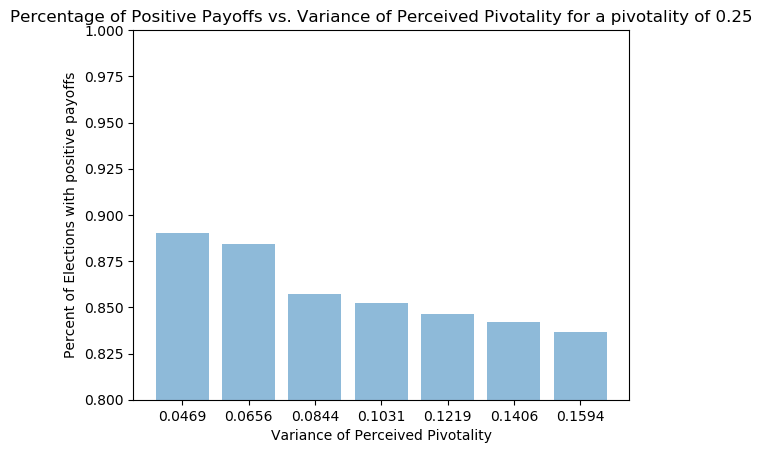

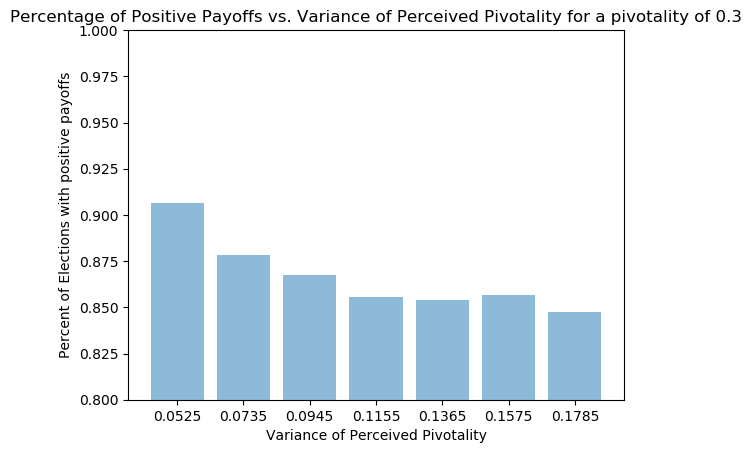

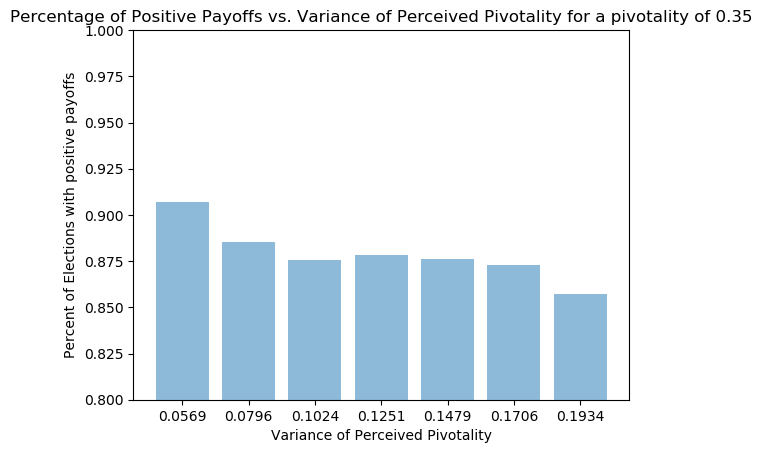

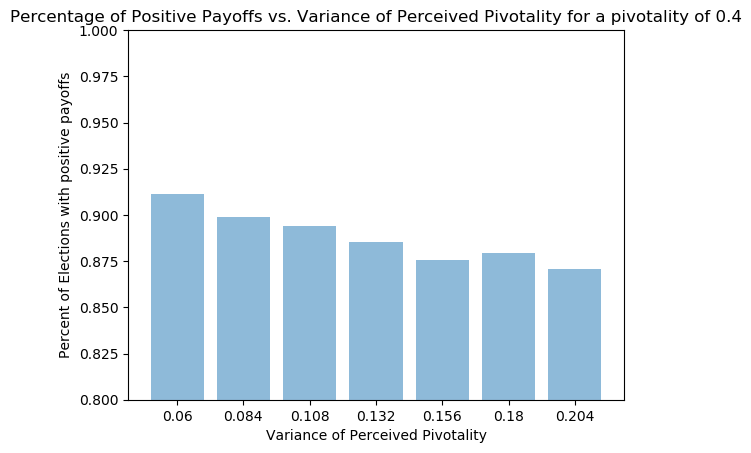

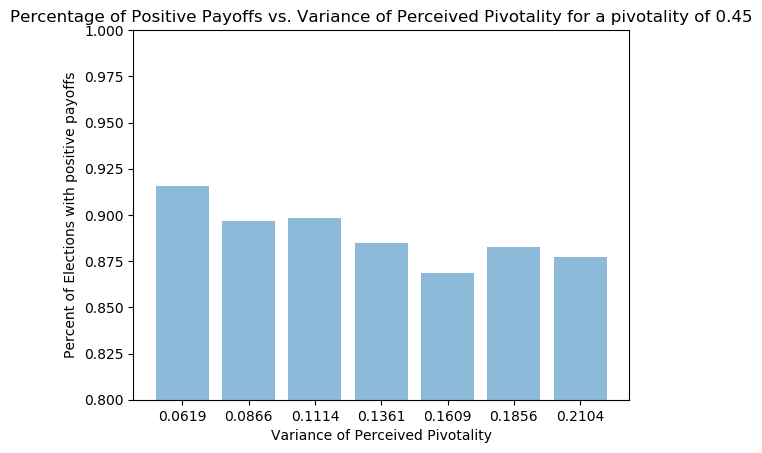

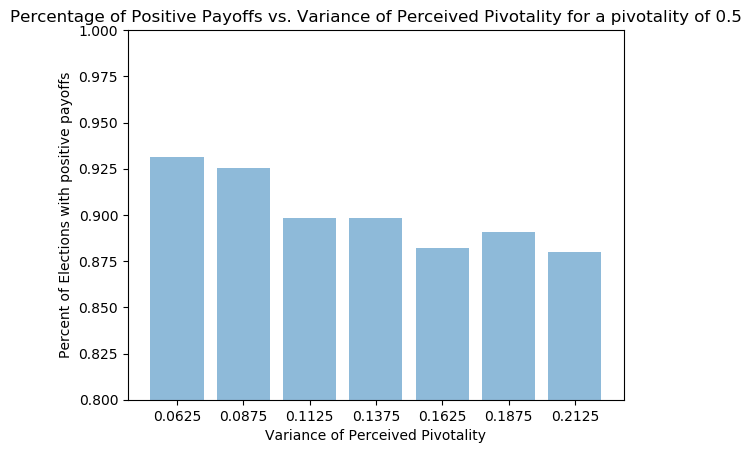

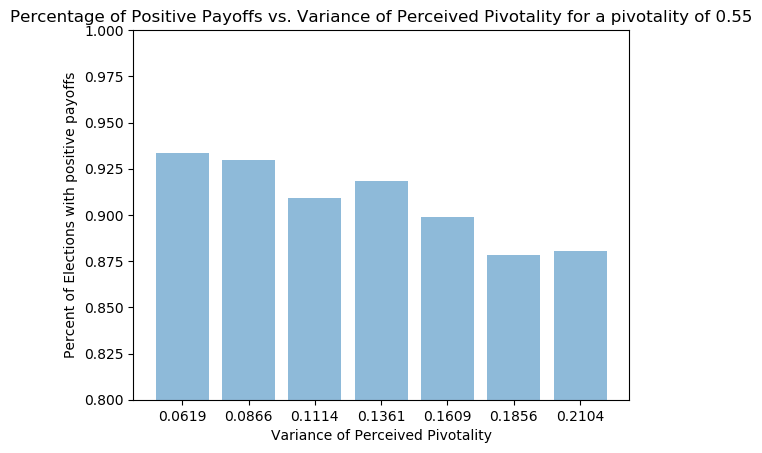

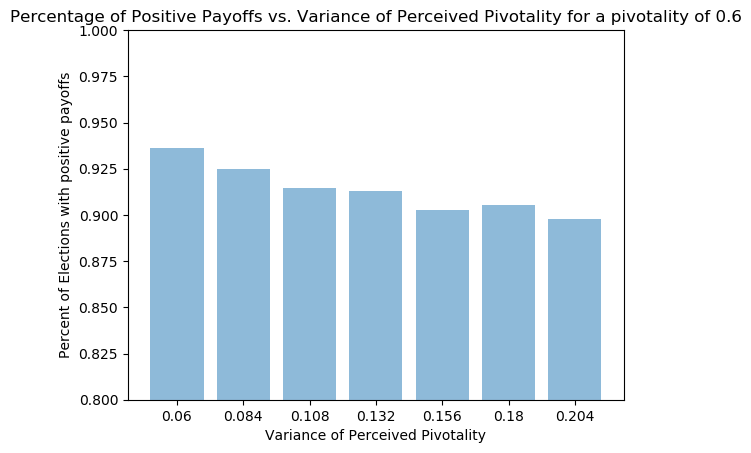

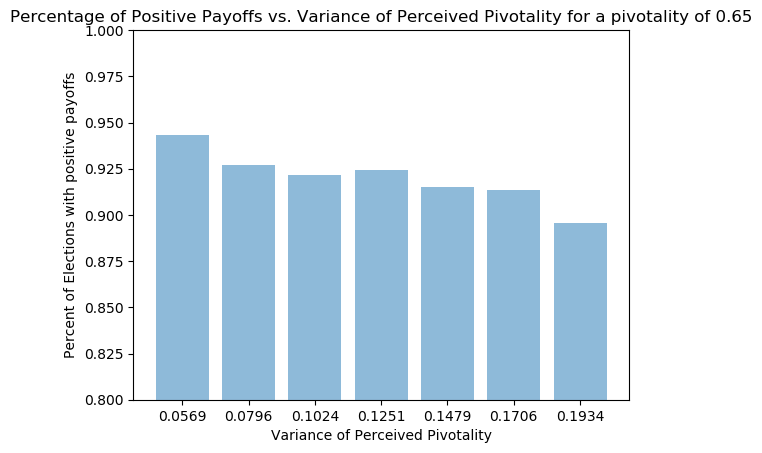

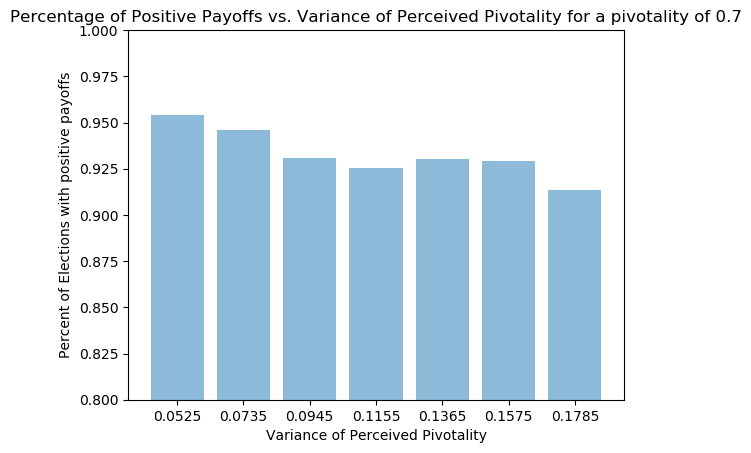

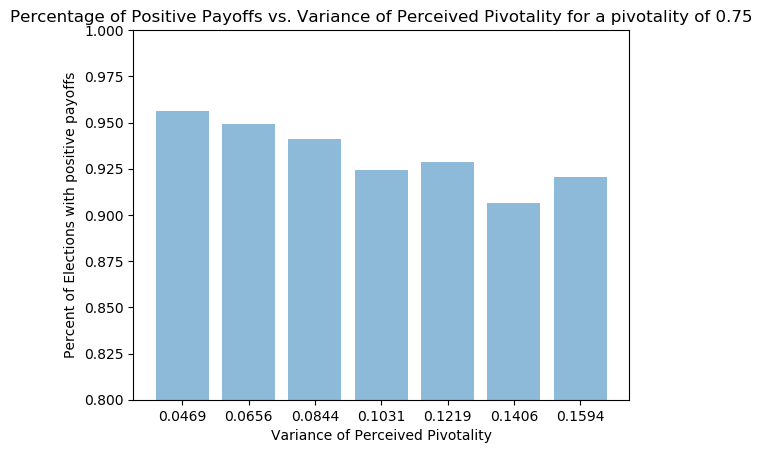

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()

for group in groupedResults:
    mean = group[0][0]
    variances = list (map (lambda lst: lst[1], group))
    y_pos = np.arange(len(variances))
    percentpositive = list (map (lambda lst: lst[2], group))
    plt.bar(y_pos, percentpositive, align='center', alpha=0.5)
    plt.xticks(y_pos, variances)
    plt.ylabel('Percent of Elections with positive payoffs')
    plt.xlabel('Variance of Perceived Pivotality')
    plt.title('Percentage of Positive Payoffs vs. Variance of Perceived Pivotality for a pivotality of '+str(group[0][0])) 
    plt.ylim(0.8, 1)
    plt.show()
